In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
DATA_COTIZACIONES_DESEMBOLSO_F=pd.read_csv('DATA_COTIZACIONES_DESEMBOLSO_F.txt')
DATA_ENDEUDAMIENTO_F=DATA_ENDEUDAMIENTO_F=pd.read_csv('DATA_ENDEUDAMIENTO_F.txt').reset_index()
DATA_EVALUACIONES_F=pd.read_csv('DATA_EVALUACIONES_F.txt')
DATA_PRODUCTOS_BCO_F=pd.read_csv('DATA_PRODUCTOS_BCO_F.txt').reset_index()
DATA_SOLICITUDES_F=pd.read_csv('DATA_SOLICITUDES_F.txt')
DATA_STOCK_VARS_TEST_F=pd.read_csv('DATA_STOCK_VARS_TEST_F.txt',parse_dates=["FH_NACIMIENTO","FH_ALTA"])
DATA_STOCK_VARS_TRAIN_F=pd.read_csv('DATA_STOCK_VARS_TRAIN_F.txt',parse_dates=["FH_NACIMIENTO","FH_ALTA"])
DATA_TRANSAC_CANALES_F=pd.read_csv('DATA_TRANSAC_CANALES_F.txt')

In [3]:
frames=[DATA_STOCK_VARS_TRAIN_F,DATA_STOCK_VARS_TEST_F]
train_test=pd.concat(frames)

In [4]:
train_test.shape

(99999, 20)

In [5]:
train_test['MES_T0_FH']=train_test['MES_T0'].astype(str)
train_test['MES_T0_FH']=train_test['MES_T0_FH'].map(lambda x:x[:4]+'-'+x[4:])
train_test['MES_T0_FH'] =  pd.to_datetime(train_test['MES_T0_FH'])

In [6]:
train_test['diff_alta_nac']=(train_test["FH_ALTA"]-train_test["FH_NACIMIENTO"])/np.timedelta64(1, 'Y')
train_test['diff_MES_T0_FH_nac']=(train_test["MES_T0_FH"]-train_test["FH_NACIMIENTO"])/np.timedelta64(1, 'D')
train_test['diff_MES_T0_FH_alta']=(train_test["MES_T0_FH"]-train_test["FH_ALTA"])/np.timedelta64(1, 'D')

In [7]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 26337
Data columns (total 24 columns):
ID                      99999 non-null object
MES_T0                  99999 non-null int64
ID_CLIENTE              99999 non-null int64
FUGA_3M                 73661 non-null float64
FH_NACIMIENTO           98853 non-null datetime64[ns]
FH_ALTA                 98946 non-null datetime64[ns]
RGO_RIEGO_BBVA          99999 non-null int64
RGO_RIESGO_SIST         99999 non-null int64
RGO_SDO_MEDIO_ACTIVO    99999 non-null int64
RGO_SDO_MEDIO_PASIVO    99999 non-null int64
RGO_MARGEN_OPER_MES     99999 non-null int64
RGO_MARGEN_OPER_ACUM    99999 non-null int64
RGO_FACTURA_ANUAL       99999 non-null int64
TO_EMPLEADOS            98107 non-null float64
CD_SBS_NORMAL           69722 non-null float64
CD_SBS_CPP              69722 non-null float64
CD_SBS_DDP              69722 non-null float64
TP_VIVI                 98828 non-null object
TP_PERSONA              99999 non-null object
TIPO_

# Intuitive feature engineering

In [8]:
train_test['dif_activo_pasivo']=train_test['RGO_SDO_MEDIO_ACTIVO']-train_test['RGO_SDO_MEDIO_PASIVO']
train_test['sum_activo_pasivo']=train_test['RGO_SDO_MEDIO_ACTIVO']+train_test['RGO_SDO_MEDIO_PASIVO']
train_test['prod_activo_pasivo']=train_test['RGO_SDO_MEDIO_ACTIVO']/train_test['RGO_SDO_MEDIO_PASIVO']

In [9]:
train_test['dif_acum_mes']=-train_test['RGO_MARGEN_OPER_MES']+train_test['RGO_MARGEN_OPER_ACUM']
train_test['sum_acum_mes']=train_test['RGO_MARGEN_OPER_MES']+train_test['RGO_MARGEN_OPER_ACUM']
train_test['prod_acum_mes']=train_test['RGO_MARGEN_OPER_MES']/train_test['RGO_MARGEN_OPER_ACUM']

In [10]:
train_test['dif_bbva_sit']=-train_test['RGO_RIEGO_BBVA']+train_test['RGO_RIESGO_SIST']
train_test['sum_bbva_sist']=train_test['RGO_RIEGO_BBVA']+train_test['RGO_RIESGO_SIST']
train_test['prod_bbva_sist']=train_test['RGO_RIEGO_BBVA']/train_test['RGO_RIESGO_SIST']

In [11]:
train_test['mes_anual']=train_test['RGO_MARGEN_OPER_MES']/train_test['RGO_FACTURA_ANUAL']
train_test['acum_anual']=train_test['RGO_MARGEN_OPER_ACUM']/train_test['RGO_FACTURA_ANUAL']

In [12]:
train_test['empl_tiempo']=train_test['TO_EMPLEADOS']/train_test['diff_alta_nac']

In [13]:
train_test['ID']=train_test['ID'].map(lambda x:x.replace('_','')).astype(int)

In [14]:
train_test['pas_act_count']=train_test.groupby(['RGO_SDO_MEDIO_ACTIVO','RGO_SDO_MEDIO_PASIVO'])['ID_CLIENTE'].transform('count')
train_test['mes_acum_count']=train_test.groupby(['RGO_MARGEN_OPER_MES','RGO_MARGEN_OPER_ACUM'])['ID_CLIENTE'].transform('count')
train_test['bbva_sist_count']=train_test.groupby(['RGO_RIEGO_BBVA','RGO_RIESGO_SIST'])['ID_CLIENTE'].transform('count')

In [15]:
train_test['MES_T0_count']=train_test.groupby('MES_T0')['ID_CLIENTE'].transform('count')

In [16]:
train_test.head()

,ID,MES_T0,ID_CLIENTE,FUGA_3M,FH_NACIMIENTO,FH_ALTA,RGO_RIEGO_BBVA,RGO_RIESGO_SIST,RGO_SDO_MEDIO_ACTIVO,RGO_SDO_MEDIO_PASIVO,...,dif_bbva_sit,sum_bbva_sist,prod_bbva_sist,mes_anual,acum_anual,empl_tiempo,pas_act_count,mes_acum_count,bbva_sist_count,MES_T0_count
0,20180848117,201808,48117,0.0,2015-12-04,2017-09-04,1,8,6,9,...,7,9,0.125000,0.142857,0.142857,1.141383,2863,2342,69,8209
1,20180887846,201808,87846,1.0,1970-11-11,2007-08-14,1,13,16,15,...,12,14,0.076923,0.055556,0.055556,0.000000,317,2342,30,8209
2,20180889372,201808,89372,0.0,1985-01-23,2006-02-22,1,5,8,7,...,4,6,0.200000,0.111111,0.111111,0.000000,1668,2342,102,8209
3,20180487164,201804,87164,0.0,2008-01-01,2008-06-12,1,17,1,20,...,16,18,0.058824,0.500000,0.500000,0.000000,879,2342,15,8094
4,20180413922,201804,13922,0.0,2016-08-11,2017-01-04,1,15,15,17,...,14,16,0.066667,0.058824,0.058824,0.000000,304,2342,17,8094


In [17]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 26337
Data columns (total 40 columns):
ID                      99999 non-null int64
MES_T0                  99999 non-null int64
ID_CLIENTE              99999 non-null int64
FUGA_3M                 73661 non-null float64
FH_NACIMIENTO           98853 non-null datetime64[ns]
FH_ALTA                 98946 non-null datetime64[ns]
RGO_RIEGO_BBVA          99999 non-null int64
RGO_RIESGO_SIST         99999 non-null int64
RGO_SDO_MEDIO_ACTIVO    99999 non-null int64
RGO_SDO_MEDIO_PASIVO    99999 non-null int64
RGO_MARGEN_OPER_MES     99999 non-null int64
RGO_MARGEN_OPER_ACUM    99999 non-null int64
RGO_FACTURA_ANUAL       99999 non-null int64
TO_EMPLEADOS            98107 non-null float64
CD_SBS_NORMAL           69722 non-null float64
CD_SBS_CPP              69722 non-null float64
CD_SBS_DDP              69722 non-null float64
TP_VIVI                 98828 non-null object
TP_PERSONA              99999 non-null object
TIPO_N

In [18]:
columns=train_test.columns.to_list()

In [19]:
train_test=pd.get_dummies(train_test,columns=['TP_VIVI','TP_PERSONA','TIPO_NEGOCIO'])

In [20]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 26337
Data columns (total 45 columns):
ID                      99999 non-null int64
MES_T0                  99999 non-null int64
ID_CLIENTE              99999 non-null int64
FUGA_3M                 73661 non-null float64
FH_NACIMIENTO           98853 non-null datetime64[ns]
FH_ALTA                 98946 non-null datetime64[ns]
RGO_RIEGO_BBVA          99999 non-null int64
RGO_RIESGO_SIST         99999 non-null int64
RGO_SDO_MEDIO_ACTIVO    99999 non-null int64
RGO_SDO_MEDIO_PASIVO    99999 non-null int64
RGO_MARGEN_OPER_MES     99999 non-null int64
RGO_MARGEN_OPER_ACUM    99999 non-null int64
RGO_FACTURA_ANUAL       99999 non-null int64
TO_EMPLEADOS            98107 non-null float64
CD_SBS_NORMAL           69722 non-null float64
CD_SBS_CPP              69722 non-null float64
CD_SBS_DDP              69722 non-null float64
MES_T0_FH               99999 non-null datetime64[ns]
diff_alta_nac           98853 non-null float

In [21]:
train_test['FH_NACIMIENTO']=(train_test['FH_NACIMIENTO']-datetime.datetime(1970,1,1)).dt.total_seconds()
train_test['FH_ALTA']=(train_test['FH_ALTA']-datetime.datetime(1970,1,1)).dt.total_seconds()
train_test['MES_T0_FH']=(train_test['MES_T0_FH']-datetime.datetime(1970,1,1)).dt.total_seconds()

# Dataframe products BCO

In [22]:
frames=[DATA_STOCK_VARS_TRAIN_F,DATA_STOCK_VARS_TEST_F]
train_test_bco=pd.concat(frames)

In [23]:
train_test_bco.head()

,ID,MES_T0,ID_CLIENTE,FUGA_3M,FH_NACIMIENTO,FH_ALTA,RGO_RIEGO_BBVA,RGO_RIESGO_SIST,RGO_SDO_MEDIO_ACTIVO,RGO_SDO_MEDIO_PASIVO,RGO_MARGEN_OPER_MES,RGO_MARGEN_OPER_ACUM,RGO_FACTURA_ANUAL,TO_EMPLEADOS,CD_SBS_NORMAL,CD_SBS_CPP,CD_SBS_DDP,TP_VIVI,TP_PERSONA,TIPO_NEGOCIO
0,201808_48117,201808,48117,0.0,2015-12-04,2017-09-04,1,8,6,9,1,1,7,2.0,100.00,0.00,0.0,LEGAL,J,Pyme
1,201808_87846,201808,87846,1.0,1970-11-11,2007-08-14,1,13,16,15,1,1,18,0.0,99.97,0.03,0.0,HOGAR,A,PNN
2,201808_89372,201808,89372,0.0,1985-01-23,2006-02-22,1,5,8,7,1,1,9,0.0,100.00,0.00,0.0,HOGAR,A,PNN
3,201804_87164,201804,87164,0.0,2008-01-01,2008-06-12,1,17,1,20,1,1,2,0.0,NaN,NaN,NaN,LEGAL,J,Pyme
4,201804_13922,201804,13922,0.0,2016-08-11,2017-01-04,1,15,15,17,1,1,17,0.0,NaN,NaN,NaN,LEGAL,J,Pyme


In [24]:
train_test_bco['MES_T0_FH']=train_test_bco['MES_T0'].astype(str)
train_test_bco['MES_T0_FH']=train_test_bco['MES_T0_FH'].map(lambda x:x[:4]+'-'+x[4:])
train_test_bco['MES_T0_FH'] =  pd.to_datetime(train_test_bco['MES_T0_FH'])

In [25]:
DATA_PRODUCTOS_BCO_F['MES_FH']=DATA_PRODUCTOS_BCO_F['MES'].astype(str)
DATA_PRODUCTOS_BCO_F['MES_FH']=DATA_PRODUCTOS_BCO_F['MES_FH'].map(lambda x:x[:4]+'-'+x[4:])
DATA_PRODUCTOS_BCO_F['MES_FH'] =  pd.to_datetime(DATA_PRODUCTOS_BCO_F['MES_FH'])

In [26]:
DATA_PRODUCTOS_BCO_F_nw=pd.merge(DATA_PRODUCTOS_BCO_F,train_test_bco[['MES_T0_FH','ID_CLIENTE']],how='left',on='ID_CLIENTE')

In [27]:
DATA_PRODUCTOS_BCO_F_nw.head()

,index,MES,ID_CLIENTE,NU_CTA_AHORRO,RGO_SDO_AHORRO,RGO_MARGEN_AHORRO,NU_CTA_CTE,RGO_SDO_CTE,RGO_MARGEN_CTE,NU_CTA_FMUTUO,...,NU_CTA_CARTERA,RGO_SDO_CARTERA,RGO_MARGEN_CARTERA,NU_CTA_STANDBY,RGO_SDO_STANDBY,RGO_MARGEN_STANDBY,RGO_PASIVO,RGO_ACTIVO,MES_FH,MES_T0_FH
0,0,201708,44765,1,11,10,0,3,9,0,...,0,6,13,0,6,11,6,2,2017-08-01,2018-08-01
1,1,201708,32317,1,11,10,0,3,9,0,...,0,6,13,0,6,11,6,2,2017-08-01,2018-05-01
2,2,201708,59201,1,11,10,0,3,9,0,...,0,6,13,0,6,11,6,2,2017-08-01,2019-02-01
3,3,201709,13541,2,11,10,0,5,9,0,...,0,6,13,0,6,11,6,2,2017-09-01,2018-04-01
4,4,201710,32375,1,11,10,0,3,9,0,...,0,6,13,0,6,11,6,2,2017-10-01,2018-05-01


In [28]:
DATA_PRODUCTOS_BCO_F_nw['DIFF_MES']=((DATA_PRODUCTOS_BCO_F_nw['MES_T0_FH']-DATA_PRODUCTOS_BCO_F_nw['MES_FH'])/np.timedelta64(1, 'M')).round(0)

In [29]:
DATA_PRODUCTOS_BCO_F_nw.head()

,index,MES,ID_CLIENTE,NU_CTA_AHORRO,RGO_SDO_AHORRO,RGO_MARGEN_AHORRO,NU_CTA_CTE,RGO_SDO_CTE,RGO_MARGEN_CTE,NU_CTA_FMUTUO,...,RGO_SDO_CARTERA,RGO_MARGEN_CARTERA,NU_CTA_STANDBY,RGO_SDO_STANDBY,RGO_MARGEN_STANDBY,RGO_PASIVO,RGO_ACTIVO,MES_FH,MES_T0_FH,DIFF_MES
0,0,201708,44765,1,11,10,0,3,9,0,...,6,13,0,6,11,6,2,2017-08-01,2018-08-01,12.0
1,1,201708,32317,1,11,10,0,3,9,0,...,6,13,0,6,11,6,2,2017-08-01,2018-05-01,9.0
2,2,201708,59201,1,11,10,0,3,9,0,...,6,13,0,6,11,6,2,2017-08-01,2019-02-01,18.0
3,3,201709,13541,2,11,10,0,5,9,0,...,6,13,0,6,11,6,2,2017-09-01,2018-04-01,7.0
4,4,201710,32375,1,11,10,0,3,9,0,...,6,13,0,6,11,6,2,2017-10-01,2018-05-01,7.0


In [30]:
DATA_PRODUCTOS_BCO_F_nw['DIFF_MES'].unique()

array([ 12.,   9.,  18.,   7.,   6.,   5.,  10.,   4.,   2.,  16.,  15.,
        11.,   8.,   3.,  14.,   0.,  17.,  -1.,  19.,   1.,  13.,  -2.,
        -6.,  -5.,  -3.,  -4., -10.,  -8.,  -7.,  -9.])

In [31]:
DATA_PRODUCTOS_BCO_F_nw.shape

(1739335, 88)

In [32]:
DATA_PRODUCTOS_BCO_F_nw=DATA_PRODUCTOS_BCO_F_nw.loc[DATA_PRODUCTOS_BCO_F_nw['DIFF_MES']>0]
#DATA_PRODUCTOS_BCO_F_nw=DATA_PRODUCTOS_BCO_F_nw.loc[(DATA_PRODUCTOS_BCO_F_nw['DIFF_MES']>0) & (DATA_PRODUCTOS_BCO_F_nw['DIFF_MES']<3)]

In [33]:
DATA_PRODUCTOS_BCO_F_nw.shape

(1204825, 88)

In [34]:
DATA_PRODUCTOS_BCO_F_nw.head()

,index,MES,ID_CLIENTE,NU_CTA_AHORRO,RGO_SDO_AHORRO,RGO_MARGEN_AHORRO,NU_CTA_CTE,RGO_SDO_CTE,RGO_MARGEN_CTE,NU_CTA_FMUTUO,...,RGO_SDO_CARTERA,RGO_MARGEN_CARTERA,NU_CTA_STANDBY,RGO_SDO_STANDBY,RGO_MARGEN_STANDBY,RGO_PASIVO,RGO_ACTIVO,MES_FH,MES_T0_FH,DIFF_MES
0,0,201708,44765,1,11,10,0,3,9,0,...,6,13,0,6,11,6,2,2017-08-01,2018-08-01,12.0
1,1,201708,32317,1,11,10,0,3,9,0,...,6,13,0,6,11,6,2,2017-08-01,2018-05-01,9.0
2,2,201708,59201,1,11,10,0,3,9,0,...,6,13,0,6,11,6,2,2017-08-01,2019-02-01,18.0
3,3,201709,13541,2,11,10,0,5,9,0,...,6,13,0,6,11,6,2,2017-09-01,2018-04-01,7.0
4,4,201710,32375,1,11,10,0,3,9,0,...,6,13,0,6,11,6,2,2017-10-01,2018-05-01,7.0


In [35]:
DATA_PRODUCTOS_BCO_F_nw=DATA_PRODUCTOS_BCO_F_nw.sort_values(by=['ID_CLIENTE','MES'])

In [36]:
DATA_PRODUCTOS_BCO_F_nw['count_cli']=DATA_PRODUCTOS_BCO_F_nw.groupby('ID_CLIENTE')['ID_CLIENTE'].transform('count')

In [37]:
DATA_PRODUCTOS_BCO_F_nw['last_month']=DATA_PRODUCTOS_BCO_F_nw.groupby('ID_CLIENTE')['MES'].transform('max')

In [38]:
DATA_PRODUCTOS_BCO_F_nw['diff_mes_max']=DATA_PRODUCTOS_BCO_F_nw.groupby('ID_CLIENTE')['DIFF_MES'].transform('max')

In [39]:
DATA_PRODUCTOS_BCO_F_nw['diff_mes_min']=DATA_PRODUCTOS_BCO_F_nw.groupby('ID_CLIENTE')['DIFF_MES'].transform('min')

In [40]:
DATA_PRODUCTOS_BCO_F_nw['diff_mes_max_min']=DATA_PRODUCTOS_BCO_F_nw['diff_mes_max']-DATA_PRODUCTOS_BCO_F_nw['diff_mes_min']

In [41]:
DATA_PRODUCTOS_BCO_F_nw.drop(['MES_FH','MES_T0_FH'],axis=1,inplace=True)

In [42]:
num_col=DATA_PRODUCTOS_BCO_F_nw.columns.to_list()
num_col.remove('ID_CLIENTE')

In [43]:
aggs = {}
for col in num_col:
    aggs[col] = ['sum','mean']
    

In [44]:
aggs

{'index': ['sum', 'mean'],
 'MES': ['sum', 'mean'],
 'NU_CTA_AHORRO': ['sum', 'mean'],
 'RGO_SDO_AHORRO': ['sum', 'mean'],
 'RGO_MARGEN_AHORRO': ['sum', 'mean'],
 'NU_CTA_CTE': ['sum', 'mean'],
 'RGO_SDO_CTE': ['sum', 'mean'],
 'RGO_MARGEN_CTE': ['sum', 'mean'],
 'NU_CTA_FMUTUO': ['sum', 'mean'],
 'RGO_SDO_FMUTUO': ['sum', 'mean'],
 'RGO_MARGEN_FMUTUO': ['sum', 'mean'],
 'NU_CTA_PZO': ['sum', 'mean'],
 'RGO_SDO_PZO': ['sum', 'mean'],
 'RGO_MARGEN_PZO': ['sum', 'mean'],
 'NU_CTA_CTS': ['sum', 'mean'],
 'RGO_SDO_CTS': ['sum', 'mean'],
 'RGO_MARGEN_CTS': ['sum', 'mean'],
 'NU_CTA_PREST_COM': ['sum', 'mean'],
 'RGO_SDO_PREST_COM': ['sum', 'mean'],
 'RGO_MARGEN_PREST_COM': ['sum', 'mean'],
 'NU_CTA_PREST_CONS': ['sum', 'mean'],
 'RGO_SDO_PREST_CONS': ['sum', 'mean'],
 'RGO_MARGEN_PREST_CONS': ['sum', 'mean'],
 'NU_CTA_PREST_VEHIC': ['sum', 'mean'],
 'RGO_SDO_PREST_VEHIC': ['sum', 'mean'],
 'RGO_MARGEN_PREST_VEHIC': ['sum', 'mean'],
 'NU_CTA_PREST_HIP': ['sum', 'mean'],
 'RGO_SDO_PREST_HIP':

In [45]:
DATA_PRODUCTOS_BCO_F_nw_agg=  DATA_PRODUCTOS_BCO_F_nw.reset_index().groupby('ID_CLIENTE').agg(aggs)
DATA_PRODUCTOS_BCO_F_nw_agg.head()
DATA_PRODUCTOS_BCO_F_nw_agg.columns = DATA_PRODUCTOS_BCO_F_nw_agg.columns.map('_'.join)
DATA_PRODUCTOS_BCO_F_nw_agg=DATA_PRODUCTOS_BCO_F_nw_agg.reset_index()
DATA_PRODUCTOS_BCO_F_nw_agg.head()

,ID_CLIENTE,index_sum,index_mean,MES_sum,MES_mean,NU_CTA_AHORRO_sum,NU_CTA_AHORRO_mean,RGO_SDO_AHORRO_sum,RGO_SDO_AHORRO_mean,RGO_MARGEN_AHORRO_sum,...,count_cli_sum,count_cli_mean,last_month_sum,last_month_mean,diff_mes_max_sum,diff_mes_max_mean,diff_mes_min_sum,diff_mes_min_mean,diff_mes_max_min_sum,diff_mes_max_min_mean
0,1,18065413,1.642310e+06,2219272,201752.000000,11,1.0,44,4.000000,96,...,121,11,2219855,201805,121.0,11.0,11.0,1.0,110.0,10.0
1,2,10842812,8.340625e+05,2622885,201760.384615,13,1.0,158,12.153846,163,...,169,13,2623491,201807,169.0,13.0,13.0,1.0,156.0,12.0
2,3,4822729,6.028411e+05,1613860,201732.500000,8,1.0,117,14.625000,108,...,64,8,1614416,201802,64.0,8.0,8.0,1.0,56.0,7.0
3,4,4132133,1.033033e+06,807026,201756.500000,4,1.0,61,15.250000,55,...,16,4,807208,201802,16.0,4.0,4.0,1.0,12.0,3.0
4,5,17547720,1.349825e+06,2622885,201760.384615,0,0.0,62,4.769231,26,...,169,13,2623491,201807,169.0,13.0,13.0,1.0,156.0,12.0


# Dataframe debts BCO

In [46]:
DATA_STOCK_VARS_TEST_F=pd.read_csv('DATA_STOCK_VARS_TEST_F.txt',parse_dates=["FH_NACIMIENTO","FH_ALTA"])
DATA_STOCK_VARS_TRAIN_F=pd.read_csv('DATA_STOCK_VARS_TRAIN_F.txt',parse_dates=["FH_NACIMIENTO","FH_ALTA"])

In [47]:
col_empre=['RGO_SDGRANDES_EMP',
 'RGO_SDMEDIANAS_EMP',
 'RGO_SDPEQUENIAS_EMP',
 'RGO_SDMICROEMPRESA',]

In [48]:
DATA_ENDEUDAMIENTO_F['sum_rng_emp']=DATA_ENDEUDAMIENTO_F[col_empre].sum(axis=1)

In [49]:
DATA_ENDEUDAMIENTO_F['sd_dir_ind']=DATA_ENDEUDAMIENTO_F['RGO_SDDIRECTO']-DATA_ENDEUDAMIENTO_F['RGO_SDINDIRECTO']

In [50]:
col_dirin=['RGO_SDDIRECTO',
 'RGO_SDINDIRECTO',
'RGO_SDTOTAL']

In [51]:
DATA_ENDEUDAMIENTO_F['sum_dir_ind_tot']=DATA_ENDEUDAMIENTO_F[col_dirin].sum(axis=1)

In [52]:
DATA_ENDEUDAMIENTO_F.head()

,index,MES,ID_CLIENTE,CD_BANCO,ST_CREDITO,RGO_SDGRANDES_EMP,RGO_SDMEDIANAS_EMP,RGO_SDPEQUENIAS_EMP,RGO_SDMICROEMPRESA,RGO_SDDIRECTO,...,RGO_SDCREDITO,RGO_SDACEPBANCA,RGO_SDGTIA_HIPOTEC,RGO_SDGTIA_PREFE,RGO_SD_NOPREFE,RGO_SD_SINLEASING,RGO_SDLEA_PEM,sum_rng_emp,sd_dir_ind,sum_dir_ind_tot
0,0,201809,97597,231,1.0,19,15,19,6,17,...,6,18,7,9,3,17,4,59,6,45
1,1,201804,76119,106,1.0,19,15,19,6,17,...,6,18,7,9,3,17,4,59,6,45
2,2,201805,50080,228,1.0,19,15,19,6,17,...,6,18,7,9,3,17,4,59,6,45
3,3,201803,98183,107,1.0,19,15,19,6,17,...,6,18,7,9,3,17,4,59,6,45
4,4,201901,17109,2,1.0,19,15,19,6,17,...,6,18,7,9,3,17,4,59,6,45


In [53]:
for col in DATA_ENDEUDAMIENTO_F.columns:
    DATA_ENDEUDAMIENTO_F[col+'_max_min_id_mes']=DATA_ENDEUDAMIENTO_F.groupby(['ID_CLIENTE','MES'])[col].transform('max')-DATA_ENDEUDAMIENTO_F.groupby(['ID_CLIENTE','MES'])[col].transform('min')
    

In [54]:
erase=[]
for col in DATA_ENDEUDAMIENTO_F.columns:
    if len(DATA_ENDEUDAMIENTO_F[col].unique())==1:
        erase.append(col)

In [55]:
DATA_ENDEUDAMIENTO_F.drop(erase,axis=1,inplace=True)

In [56]:
DATA_ENDEUDAMIENTO_F['CD_BANCO_max_min']=DATA_ENDEUDAMIENTO_F.groupby(['ID_CLIENTE','MES'])['CD_BANCO'].transform('max')-DATA_ENDEUDAMIENTO_F.groupby(['ID_CLIENTE','MES'])['CD_BANCO'].transform('min')

In [57]:
DATA_ENDEUDAMIENTO_F.shape

(3071165, 59)

In [58]:
frames=[DATA_STOCK_VARS_TRAIN_F,DATA_STOCK_VARS_TEST_F]
train_test_end=pd.concat(frames)

In [59]:
train_test_end.head()

,ID,MES_T0,ID_CLIENTE,FUGA_3M,FH_NACIMIENTO,FH_ALTA,RGO_RIEGO_BBVA,RGO_RIESGO_SIST,RGO_SDO_MEDIO_ACTIVO,RGO_SDO_MEDIO_PASIVO,RGO_MARGEN_OPER_MES,RGO_MARGEN_OPER_ACUM,RGO_FACTURA_ANUAL,TO_EMPLEADOS,CD_SBS_NORMAL,CD_SBS_CPP,CD_SBS_DDP,TP_VIVI,TP_PERSONA,TIPO_NEGOCIO
0,201808_48117,201808,48117,0.0,2015-12-04,2017-09-04,1,8,6,9,1,1,7,2.0,100.00,0.00,0.0,LEGAL,J,Pyme
1,201808_87846,201808,87846,1.0,1970-11-11,2007-08-14,1,13,16,15,1,1,18,0.0,99.97,0.03,0.0,HOGAR,A,PNN
2,201808_89372,201808,89372,0.0,1985-01-23,2006-02-22,1,5,8,7,1,1,9,0.0,100.00,0.00,0.0,HOGAR,A,PNN
3,201804_87164,201804,87164,0.0,2008-01-01,2008-06-12,1,17,1,20,1,1,2,0.0,NaN,NaN,NaN,LEGAL,J,Pyme
4,201804_13922,201804,13922,0.0,2016-08-11,2017-01-04,1,15,15,17,1,1,17,0.0,NaN,NaN,NaN,LEGAL,J,Pyme


In [60]:
train_test_end['MES_T0_FH']=train_test_end['MES_T0'].astype(str)
train_test_end['MES_T0_FH']=train_test_end['MES_T0_FH'].map(lambda x:x[:4]+'-'+x[4:])
train_test_end['MES_T0_FH'] =  pd.to_datetime(train_test_end['MES_T0_FH'])

In [61]:
DATA_ENDEUDAMIENTO_F['MES_FH']=DATA_ENDEUDAMIENTO_F['MES'].astype(str)
DATA_ENDEUDAMIENTO_F['MES_FH']=DATA_ENDEUDAMIENTO_F['MES_FH'].map(lambda x:x[:4]+'-'+x[4:])
DATA_ENDEUDAMIENTO_F['MES_FH'] =  pd.to_datetime(DATA_ENDEUDAMIENTO_F['MES_FH'])

In [62]:
DATA_ENDEUDAMIENTO_F_nw=pd.merge(DATA_ENDEUDAMIENTO_F,train_test_end[['MES_T0_FH','ID_CLIENTE']],how='left',on='ID_CLIENTE')

In [63]:
DATA_ENDEUDAMIENTO_F_nw.head()

,index,MES,ID_CLIENTE,CD_BANCO,ST_CREDITO,RGO_SDGRANDES_EMP,RGO_SDMEDIANAS_EMP,RGO_SDPEQUENIAS_EMP,RGO_SDMICROEMPRESA,RGO_SDDIRECTO,...,RGO_SDGTIA_PREFE_max_min_id_mes,RGO_SD_NOPREFE_max_min_id_mes,RGO_SD_SINLEASING_max_min_id_mes,RGO_SDLEA_PEM_max_min_id_mes,sum_rng_emp_max_min_id_mes,sd_dir_ind_max_min_id_mes,sum_dir_ind_tot_max_min_id_mes,CD_BANCO_max_min,MES_FH,MES_T0_FH
0,0,201809,97597,231,1.0,19,15,19,6,17,...,3,16,14,0,20,15,30,0,2018-09-01,2018-07-01
1,1,201804,76119,106,1.0,19,15,19,6,17,...,11,17,14,4,20,19,31,17,2018-04-01,2018-05-01
2,2,201805,50080,228,1.0,19,15,19,6,17,...,0,0,0,0,0,0,0,0,2018-05-01,2018-08-01
3,3,201803,98183,107,1.0,19,15,19,6,17,...,1,16,12,0,17,14,28,0,2018-03-01,2018-07-01
4,4,201901,17109,2,1.0,19,15,19,6,17,...,2,16,14,5,24,20,30,104,2019-01-01,2018-06-01


In [64]:
DATA_ENDEUDAMIENTO_F_nw['DIFF_MES']=((DATA_ENDEUDAMIENTO_F_nw['MES_T0_FH']-DATA_ENDEUDAMIENTO_F_nw['MES_FH'])/np.timedelta64(1, 'M')).round(0)

In [65]:
DATA_ENDEUDAMIENTO_F_nw.head()

,index,MES,ID_CLIENTE,CD_BANCO,ST_CREDITO,RGO_SDGRANDES_EMP,RGO_SDMEDIANAS_EMP,RGO_SDPEQUENIAS_EMP,RGO_SDMICROEMPRESA,RGO_SDDIRECTO,...,RGO_SD_NOPREFE_max_min_id_mes,RGO_SD_SINLEASING_max_min_id_mes,RGO_SDLEA_PEM_max_min_id_mes,sum_rng_emp_max_min_id_mes,sd_dir_ind_max_min_id_mes,sum_dir_ind_tot_max_min_id_mes,CD_BANCO_max_min,MES_FH,MES_T0_FH,DIFF_MES
0,0,201809,97597,231,1.0,19,15,19,6,17,...,16,14,0,20,15,30,0,2018-09-01,2018-07-01,-2.0
1,1,201804,76119,106,1.0,19,15,19,6,17,...,17,14,4,20,19,31,17,2018-04-01,2018-05-01,1.0
2,2,201805,50080,228,1.0,19,15,19,6,17,...,0,0,0,0,0,0,0,2018-05-01,2018-08-01,3.0
3,3,201803,98183,107,1.0,19,15,19,6,17,...,16,12,0,17,14,28,0,2018-03-01,2018-07-01,4.0
4,4,201901,17109,2,1.0,19,15,19,6,17,...,16,14,5,24,20,30,104,2019-01-01,2018-06-01,-7.0


In [66]:
DATA_ENDEUDAMIENTO_F_nw['DIFF_MES'].unique()

array([ -2.,   1.,   3.,   4.,  -7.,   7.,  18.,  11.,  -1.,  10.,   6.,
        -4.,  -6.,   2.,   0.,  12.,   9.,  -3.,   8.,  19.,   5.,  14.,
        17.,  13.,  -5.,  15.,  -9.,  16.,  -8., -10.])

In [67]:
DATA_ENDEUDAMIENTO_F_nw.shape

(3071165, 62)

In [68]:
DATA_ENDEUDAMIENTO_F_nw=DATA_ENDEUDAMIENTO_F_nw.loc[DATA_ENDEUDAMIENTO_F_nw['DIFF_MES']>0]
#DATA_PRODUCTOS_BCO_F_nw=DATA_PRODUCTOS_BCO_F_nw.loc[(DATA_PRODUCTOS_BCO_F_nw['DIFF_MES']>0) & (DATA_PRODUCTOS_BCO_F_nw['DIFF_MES']<3)]

In [69]:
DATA_ENDEUDAMIENTO_F_nw.shape

(2174946, 62)

In [70]:
DATA_ENDEUDAMIENTO_F_nw.head()

,index,MES,ID_CLIENTE,CD_BANCO,ST_CREDITO,RGO_SDGRANDES_EMP,RGO_SDMEDIANAS_EMP,RGO_SDPEQUENIAS_EMP,RGO_SDMICROEMPRESA,RGO_SDDIRECTO,...,RGO_SD_NOPREFE_max_min_id_mes,RGO_SD_SINLEASING_max_min_id_mes,RGO_SDLEA_PEM_max_min_id_mes,sum_rng_emp_max_min_id_mes,sd_dir_ind_max_min_id_mes,sum_dir_ind_tot_max_min_id_mes,CD_BANCO_max_min,MES_FH,MES_T0_FH,DIFF_MES
1,1,201804,76119,106,1.0,19,15,19,6,17,...,17,14,4,20,19,31,17,2018-04-01,2018-05-01,1.0
2,2,201805,50080,228,1.0,19,15,19,6,17,...,0,0,0,0,0,0,0,2018-05-01,2018-08-01,3.0
3,3,201803,98183,107,1.0,19,15,19,6,17,...,16,12,0,17,14,28,0,2018-03-01,2018-07-01,4.0
5,5,201801,85467,72,1.0,19,15,19,6,17,...,13,6,15,34,11,14,128,2018-01-01,2018-08-01,7.0
6,6,201707,59930,106,1.0,19,15,19,6,17,...,16,15,0,14,13,26,0,2017-07-01,2019-01-01,18.0


In [71]:
DATA_ENDEUDAMIENTO_F_nw=DATA_ENDEUDAMIENTO_F_nw.sort_values(by=['ID_CLIENTE','MES'])

In [72]:
DATA_ENDEUDAMIENTO_F_nw.head(20)

,index,MES,ID_CLIENTE,CD_BANCO,ST_CREDITO,RGO_SDGRANDES_EMP,RGO_SDMEDIANAS_EMP,RGO_SDPEQUENIAS_EMP,RGO_SDMICROEMPRESA,RGO_SDDIRECTO,...,RGO_SD_NOPREFE_max_min_id_mes,RGO_SD_SINLEASING_max_min_id_mes,RGO_SDLEA_PEM_max_min_id_mes,sum_rng_emp_max_min_id_mes,sd_dir_ind_max_min_id_mes,sum_dir_ind_tot_max_min_id_mes,CD_BANCO_max_min,MES_FH,MES_T0_FH,DIFF_MES
47367,47367,201710,1,123,1.0,5,16,3,18,11,...,2,7,3,4,11,16,0,2017-10-01,2018-06-01,8.0
2204517,2204517,201710,1,123,NaN,7,10,13,8,2,...,2,7,3,4,11,16,0,2017-10-01,2018-06-01,8.0
282190,282190,201711,1,123,NaN,11,17,17,14,5,...,2,5,1,18,6,9,0,2017-11-01,2018-06-01,7.0
958936,958936,201711,1,123,1.0,5,16,2,18,10,...,2,5,1,18,6,9,0,2017-11-01,2018-06-01,7.0
754834,754834,201712,1,123,NaN,7,17,13,15,1,...,2,7,1,7,10,17,0,2017-12-01,2018-06-01,6.0
1334011,1334011,201712,1,123,1.0,5,20,2,18,10,...,2,7,1,7,10,17,0,2017-12-01,2018-06-01,6.0
329252,329252,201801,1,123,NaN,8,17,14,14,3,...,1,6,1,8,9,12,0,2018-01-01,2018-06-01,5.0
1325270,1325270,201801,1,123,1.0,5,20,2,18,10,...,1,6,1,8,9,12,0,2018-01-01,2018-06-01,5.0
314723,314723,201802,1,123,NaN,10,17,17,14,5,...,3,9,1,14,6,9,0,2018-02-01,2018-06-01,4.0
1316894,1316894,201802,1,123,1.0,4,20,2,18,10,...,3,9,1,14,6,9,0,2018-02-01,2018-06-01,4.0


In [73]:
DATA_ENDEUDAMIENTO_F_nw['count_cli']=DATA_ENDEUDAMIENTO_F_nw.groupby('ID_CLIENTE')['ID_CLIENTE'].transform('count')
DATA_ENDEUDAMIENTO_F_nw['last_month']=DATA_ENDEUDAMIENTO_F_nw.groupby('ID_CLIENTE')['MES'].transform('max')
DATA_ENDEUDAMIENTO_F_nw['diff_mes_max']=DATA_ENDEUDAMIENTO_F_nw.groupby('ID_CLIENTE')['DIFF_MES'].transform('max')
DATA_ENDEUDAMIENTO_F_nw['diff_mes_min']=DATA_ENDEUDAMIENTO_F_nw.groupby('ID_CLIENTE')['DIFF_MES'].transform('min')
DATA_ENDEUDAMIENTO_F_nw['diff_mes_max_min']=DATA_ENDEUDAMIENTO_F_nw['diff_mes_max']-DATA_ENDEUDAMIENTO_F_nw['diff_mes_min']

In [74]:
DATA_ENDEUDAMIENTO_F_nw.drop(['MES_FH','MES_T0_FH'],axis=1,inplace=True)

In [75]:
num_col=DATA_ENDEUDAMIENTO_F_nw.columns.to_list()
num_col.remove('ID_CLIENTE')

In [76]:
aggs = {}
for col in num_col:
    aggs[col] = ['sum','mean']
    

In [77]:
aggs

{'index': ['sum', 'mean'],
 'MES': ['sum', 'mean'],
 'CD_BANCO': ['sum', 'mean'],
 'ST_CREDITO': ['sum', 'mean'],
 'RGO_SDGRANDES_EMP': ['sum', 'mean'],
 'RGO_SDMEDIANAS_EMP': ['sum', 'mean'],
 'RGO_SDPEQUENIAS_EMP': ['sum', 'mean'],
 'RGO_SDMICROEMPRESA': ['sum', 'mean'],
 'RGO_SDDIRECTO': ['sum', 'mean'],
 'RGO_SDINDIRECTO': ['sum', 'mean'],
 'RGO_SDTOTAL': ['sum', 'mean'],
 'RGO_SDDESCLETRAS': ['sum', 'mean'],
 'RGO_SDTARJETA_EMP': ['sum', 'mean'],
 'RGO_SDLEASING': ['sum', 'mean'],
 'RGO_SDCOMEX': ['sum', 'mean'],
 'RGO_SDPREST_EMP': ['sum', 'mean'],
 'RGO_SDFACTORING': ['sum', 'mean'],
 'RGO_SDAVALES': ['sum', 'mean'],
 'RGO_SDCARTFIANZA': ['sum', 'mean'],
 'RGO_SDCREDITO': ['sum', 'mean'],
 'RGO_SDACEPBANCA': ['sum', 'mean'],
 'RGO_SDGTIA_HIPOTEC': ['sum', 'mean'],
 'RGO_SDGTIA_PREFE': ['sum', 'mean'],
 'RGO_SD_NOPREFE': ['sum', 'mean'],
 'RGO_SD_SINLEASING': ['sum', 'mean'],
 'RGO_SDLEA_PEM': ['sum', 'mean'],
 'sum_rng_emp': ['sum', 'mean'],
 'sd_dir_ind': ['sum', 'mean'],
 'sum

In [78]:
DATA_ENDEUDAMIENTO_F_nw_agg=  DATA_ENDEUDAMIENTO_F_nw.reset_index().groupby('ID_CLIENTE').agg(aggs)
DATA_ENDEUDAMIENTO_F_nw_agg.columns = DATA_ENDEUDAMIENTO_F_nw_agg.columns.map('_'.join)
DATA_ENDEUDAMIENTO_F_nw_agg=DATA_ENDEUDAMIENTO_F_nw_agg.reset_index()
DATA_ENDEUDAMIENTO_F_nw_agg.head()

,ID_CLIENTE,index_sum,index_mean,MES_sum,MES_mean,CD_BANCO_sum,CD_BANCO_mean,ST_CREDITO_sum,ST_CREDITO_mean,RGO_SDGRANDES_EMP_sum,...,count_cli_sum,count_cli_mean,last_month_sum,last_month_mean,diff_mes_max_sum,diff_mes_max_mean,diff_mes_min_sum,diff_mes_min_mean,diff_mes_max_min_sum,diff_mes_max_min_mean
0,1,15055093,9.409433e+05,3228296,201768.500000,1968,123.000000,8.0,1.0,135,...,256,16,3228880,201805,128.0,8.0,16.0,1.0,112.0,7.0
1,2,56607555,2.177214e+06,5245769,201760.346154,5938,228.384615,14.0,1.0,247,...,676,26,5246982,201807,338.0,13.0,26.0,1.0,312.0,12.0
2,3,29526469,1.845404e+06,3227720,201732.500000,1624,101.500000,16.0,1.0,105,...,256,16,3228832,201802,128.0,8.0,16.0,1.0,112.0,7.0
3,5,60129221,1.503231e+06,8070104,201752.600000,658,16.450000,22.0,1.0,608,...,1600,40,8072280,201807,520.0,13.0,40.0,1.0,480.0,12.0
4,6,31053651,1.552683e+06,4034747,201737.350000,2398,119.900000,15.0,1.0,114,...,400,20,4036040,201802,160.0,8.0,20.0,1.0,140.0,7.0


# Mergin all metadatas

In [79]:
train_test.shape

(99999, 45)

In [80]:
train_test=pd.merge(train_test,DATA_PRODUCTOS_BCO_F_nw_agg,on='ID_CLIENTE',how='left')
train_test=pd.merge(train_test,DATA_ENDEUDAMIENTO_F_nw_agg,on='ID_CLIENTE',how='left')

In [81]:
train_test.shape

(99999, 353)

In [82]:
train_test.shape

(99999, 353)

# Lightgbm kfold

In [83]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

X = train_test[:DATA_STOCK_VARS_TRAIN_F.shape[0]].drop('FUGA_3M',axis=1)
y =  train_test['FUGA_3M'][:DATA_STOCK_VARS_TRAIN_F.shape[0]]
X_test=train_test[DATA_STOCK_VARS_TRAIN_F.shape[0]:].drop('FUGA_3M',axis=1)
predictions_lgb=pd.DataFrame()
preds = pd.DataFrame()

f1=[]
i=1
importances=pd.DataFrame()
importances['Features']=X.columns
for a,b in kf.split(X,y):
    X_tr=X.iloc[a,:]
    X_te=X.iloc[b,:]
    y_train=y[a]
    y_test=y[b]
        
    train_data=lgb.Dataset(X_tr, y_train)
    test_data=lgb.Dataset(X_te, y_test, reference=train_data)
    
    print('---------- Training fold Nº {} ----------'.format(i))
    
    params = {'num_leaves': 7,
         'min_data_in_leaf': 20,
         'objective': 'binary',
         'max_depth': 20,
         #'colsample_bytree':0.2,
         'learning_rate': 0.1,
         'boosting': 'gbdt',
         'bagging_freq': 5,
         'bagging_fraction': 1,
         'feature_fraction': 1,
         'bagging_seed': 11,
         'random_state': 42,
         'metric': 'auc',
         'verbosity': -1,}
    
    model = lgb.train(params,train_data,num_boost_round=10000,valid_sets = [test_data],
                      verbose_eval=100,early_stopping_rounds = 300)
    #model.fit(X=X_train,y=y_train,eval_set=(X_test,y_test),verbose=100,early_stopping_rounds=300)
    predictions_lgb[str(i)]=model.predict(X_test,num_iterations=model.best_iteration)
    
    name = 'importance_'+str(i)
    importances[name]=model.feature_importance()
    
    f1.append(list(model.best_score.items())[0][1]['auc'])
    
    i+=1
    #gc.collect()
    
print('MEAN F1 LIGHTGBM: {}'.format(np.mean(f1)))

---------- Training fold Nº 1 ----------
Training until validation scores don't improve for 300 rounds.
[100]	valid_0's auc: 0.840183
[200]	valid_0's auc: 0.842827
[300]	valid_0's auc: 0.844065
[400]	valid_0's auc: 0.844288
[500]	valid_0's auc: 0.844103
[600]	valid_0's auc: 0.844147
[700]	valid_0's auc: 0.843378
Early stopping, best iteration is:
[444]	valid_0's auc: 0.844424
---------- Training fold Nº 2 ----------
Training until validation scores don't improve for 300 rounds.
[100]	valid_0's auc: 0.823303
[200]	valid_0's auc: 0.827086
[300]	valid_0's auc: 0.828201
[400]	valid_0's auc: 0.829288
[500]	valid_0's auc: 0.829126
[600]	valid_0's auc: 0.829043
[700]	valid_0's auc: 0.829072
[800]	valid_0's auc: 0.829092
Early stopping, best iteration is:
[519]	valid_0's auc: 0.829603
---------- Training fold Nº 3 ----------
Training until validation scores don't improve for 300 rounds.
[100]	valid_0's auc: 0.831927
[200]	valid_0's auc: 0.833899
[300]	valid_0's auc: 0.834222
[400]	valid_0's au

In [84]:
predictions_lgb['mean']=predictions_lgb.mean(axis=1)

In [85]:
predictions_lgb.head()

,1,2,3,4,5,mean
0,0.044365,0.231958,0.242426,0.087089,0.068809,0.134930
1,0.026424,0.055611,0.018962,0.016986,0.022197,0.028036
2,0.042973,0.042429,0.033307,0.057902,0.039382,0.043199
3,0.057677,0.118945,0.082396,0.156663,0.085221,0.100180
4,0.321333,0.325494,0.277886,0.254756,0.269944,0.289883


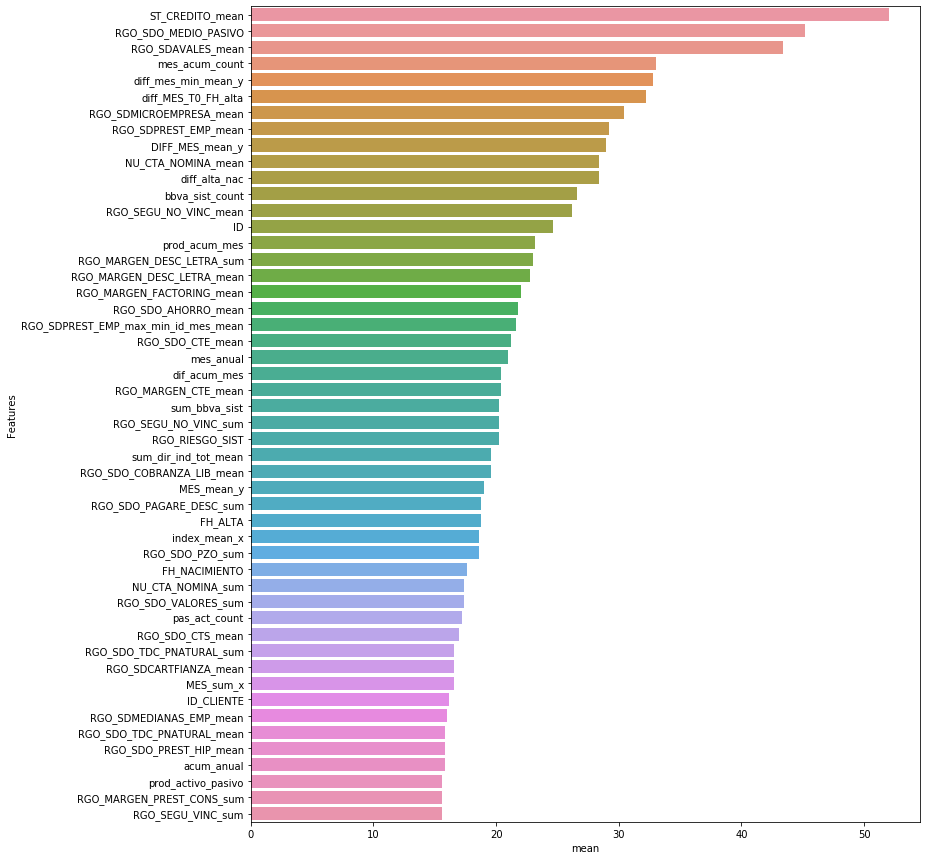

In [86]:
importances['mean']=importances.mean(axis=1)
importances_plot=importances.sort_values(by='mean',ascending=False)[0:50]
plt.figure(figsize=(12,15))
sns.barplot(x=importances_plot['mean'],y=importances_plot['Features'],order=importances_plot.sort_values(by='mean',ascending=False)['Features'])

# CatBoost kfold

In [87]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


X = train_test[:DATA_STOCK_VARS_TRAIN_F.shape[0]].drop('FUGA_3M',axis=1)
y =  train_test['FUGA_3M'][:DATA_STOCK_VARS_TRAIN_F.shape[0]]
X_test=train_test[DATA_STOCK_VARS_TRAIN_F.shape[0]:].drop('FUGA_3M',axis=1)
predictions_catboost=pd.DataFrame()
preds = pd.DataFrame()
best_score_auc=[]
f1=[]
i=1
importances=pd.DataFrame()
importances['Features']=X.columns
for a,b in kf.split(X,y):
    X_tr=X.iloc[a,:]
    X_te=X.iloc[b,:]
    y_train=y[a]
    y_test=y[b]
        
    train_data = X_tr

    train_labels = y_train

    eval_data = X_te

    eval_labels = y_test

    eval_dataset = Pool(eval_data,
                        eval_labels)
    
    print('---------- Training fold Nº {} ----------'.format(i))
    
    params = {'depth':5,
              'iterations':2000,
              'learning_rate':0.1, 
              'l2_leaf_reg':5,
              'border_count':200,
    #          'ctr_border_count':20,
              'thread_count':4}
    
    model = CatBoostClassifier(**params,eval_metric='AUC')
    model.fit(train_data,
              train_labels,
              eval_set=eval_dataset,
              verbose=100)
    predictions_prob=model.predict_proba(X_test)
    pred=[]
    for a in predictions_prob:
        pred.append(a[1])
    
    predictions_catboost[str(i)]=pred
    
    name = 'importance_'+str(i)
    importances[name]=model.get_feature_importance()
    
    best_score_auc.append(model.get_best_score()['validation']['AUC'])
    
    i+=1
    #gc.collect()
    
print('MEAN AUC LIGHTGBM: {}'.format(np.mean(best_score_auc)))

---------- Training fold Nº 1 ----------
0:	test: 0.7466910	best: 0.7466910 (0)	total: 229ms	remaining: 7m 38s
100:	test: 0.8350220	best: 0.8350220 (100)	total: 3.08s	remaining: 58s
200:	test: 0.8414128	best: 0.8414889 (198)	total: 5.82s	remaining: 52.1s
300:	test: 0.8431546	best: 0.8431546 (300)	total: 8.42s	remaining: 47.5s
400:	test: 0.8433761	best: 0.8436379 (372)	total: 11s	remaining: 43.9s
500:	test: 0.8446448	best: 0.8446448 (500)	total: 13.7s	remaining: 41s
600:	test: 0.8455886	best: 0.8457513 (589)	total: 16.3s	remaining: 38s
700:	test: 0.8457577	best: 0.8460243 (647)	total: 18.9s	remaining: 35s
800:	test: 0.8455610	best: 0.8461339 (749)	total: 21.5s	remaining: 32.1s
900:	test: 0.8459850	best: 0.8461339 (749)	total: 24.1s	remaining: 29.4s
1000:	test: 0.8457429	best: 0.8461339 (749)	total: 26.7s	remaining: 26.6s
1100:	test: 0.8459632	best: 0.8461339 (749)	total: 29.3s	remaining: 23.9s
1200:	test: 0.8456770	best: 0.8461946 (1114)	total: 31.9s	remaining: 21.2s
1300:	test: 0.84547

In [88]:
predictions_catboost['mean']=predictions_catboost.mean(axis=1)

In [89]:
predictions_catboost.head()

,1,2,3,4,5,mean
0,0.015904,0.029755,0.317450,0.133011,0.170116,0.133247
1,0.052332,0.007618,0.010232,0.040538,0.037300,0.029604
2,0.033156,0.053880,0.055118,0.033514,0.089450,0.053024
3,0.120157,0.049452,0.043707,0.061475,0.455948,0.146148
4,0.442421,0.116143,0.697908,0.295777,0.702830,0.451016


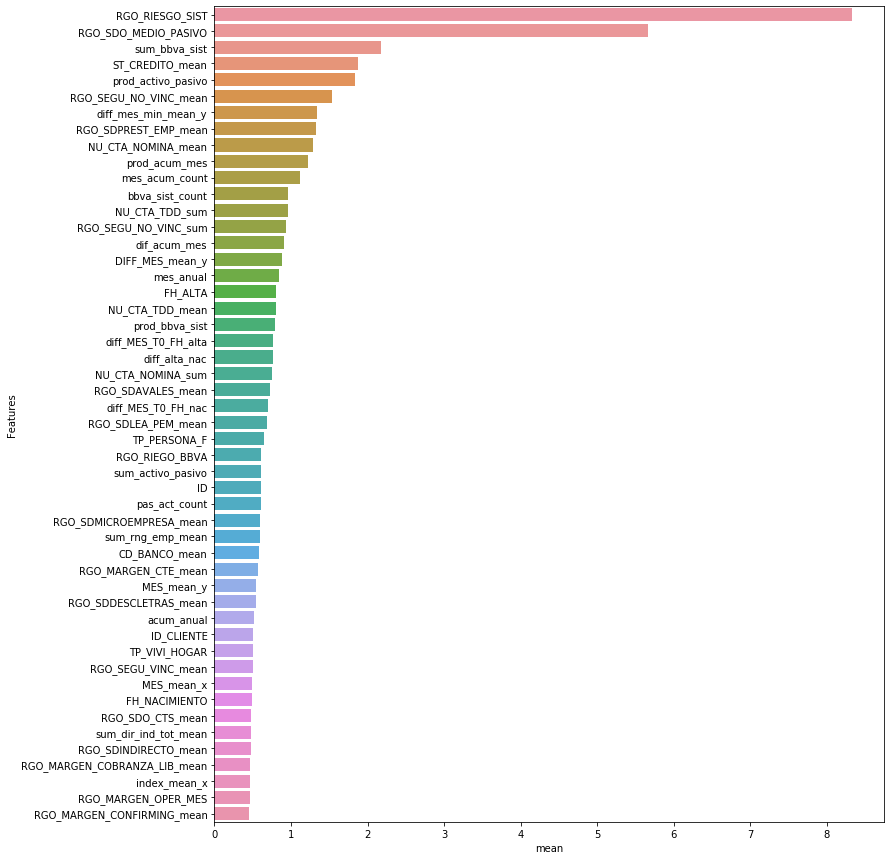

In [90]:
importances['mean']=importances.mean(axis=1)
importances_plot=importances.sort_values(by='mean',ascending=False)[0:50]
plt.figure(figsize=(12,15))
sns.barplot(x=importances_plot['mean'],y=importances_plot['Features'],order=importances_plot.sort_values(by='mean',ascending=False)['Features'])

In [91]:
predictions_catboost.head()

,1,2,3,4,5,mean
0,0.015904,0.029755,0.317450,0.133011,0.170116,0.133247
1,0.052332,0.007618,0.010232,0.040538,0.037300,0.029604
2,0.033156,0.053880,0.055118,0.033514,0.089450,0.053024
3,0.120157,0.049452,0.043707,0.061475,0.455948,0.146148
4,0.442421,0.116143,0.697908,0.295777,0.702830,0.451016


# Average of the two models

In [92]:
prediction_mean=(predictions_catboost['mean']+predictions_lgb['mean'])/2

# Submission

In [93]:
submission=pd.read_csv('DATA_STOCK_VARS_TEST_F.txt')[['ID','FUGA_3M']]

In [94]:
submission.head()

,ID,FUGA_3M
0,201901_62192,NaN
1,201902_79634,NaN
2,201901_60027,NaN
3,201812_72695,NaN
4,201901_16929,NaN


In [95]:
submission['FUGA_3M']=prediction_mean

In [96]:
submission.head()

,ID,FUGA_3M
0,201901_62192,0.134088
1,201902_79634,0.028820
2,201901_60027,0.048111
3,201812_72695,0.123164
4,201901_16929,0.370449


In [ ]:
#submission.to_csv('subbmission.csv',index=None)